#Imports

In [41]:
import pandas as pd
import numpy as np
from google.colab import drive
from matplotlib import pyplot as plt
# We will need these to convert our categorical label into 1's and 0's and our entire image to a matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array,load_img

# We will use this to encode our categorical label
from sklearn.preprocessing import LabelEncoder 

In [3]:
drive.mount('/content/gdrive', force_remount=True)

root_dir = "/content/gdrive/My Drive/train/"
from google.colab import files
uploaded = files.upload()


Mounted at /content/gdrive


Saving Testing_set.csv to Testing_set.csv


# Reading our training and test sets

In [30]:
df_train = pd.read_csv('Training_set.csv')
df_test = pd.read_csv('Testing_set.csv')

In [31]:
df_train.head()

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop


In [32]:
df_test.head()

# We don't have a label on our testing data

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg


# Data analysis

In [7]:
df_train.describe()

# As expected, we have 12600 rows
# 15 unique labels to represent each of our actions
# A frequency of 840 implies that all labels have an equal amount of rows containing them

,filename,label
count,12600,12600
unique,12600,15
top,Image_1.jpg,sitting
freq,1,840


In [8]:
actions = df_train['label'].unique()
for i in range(len(actions)):
  print('Action', i + 1 , ":", actions[i].capitalize().replace("_", " "))

Action 1 : Sitting
Action 2 : Using laptop
Action 3 : Hugging
Action 4 : Sleeping
Action 5 : Drinking
Action 6 : Clapping
Action 7 : Dancing
Action 8 : Cycling
Action 9 : Calling
Action 10 : Laughing
Action 11 : Eating
Action 12 : Fighting
Action 13 : Listening to music
Action 14 : Running
Action 15 : Texting


# Turn our arrays into matrices


In [19]:
# We want to split our training data so that the features and the labels are in seperate matrices

img_data = []
img_label = []

for i in range(len(df_train)):
    img = root_dir + df_train['filename'][i]
    img = load_img(img, target_size = (150,150)) # By convention, pictures are either 96x96 or 256x256. 150x150 strikes a nice balance between the two
    img = img_to_array(img)
    img_data.append(img)
    img_label.append(df_train["label"][i])

In [20]:
# We need to work on a matrix, so we convert our arrays using np.array()

img_data = np.array(img_data)
img_label = np.array(img_label)

In [21]:
img_data.shape

# Our data matrix has a dimension of 3, and contains the number of rows, pixels on the X axis, and pixels on the Y axis

(12600, 150, 150, 3)

In [23]:
img_label.shape

# Our label matrix is just a column vector containing the labels for our data matrix

(12600,)

# Encoding

In [24]:
# Create an instance of the class
encoder = LabelEncoder()

#Fit our data 
img_label = encoder.fit_transform(img_label)

In [ ]:
img_label = to_categorical(img_label)
print(img_label)

In [67]:
import random
from matplotlib import image as img

def display_random(n):
    
    plt.figure(figsize=(15, 20))
    for i in range(n):
        rnd = random.randint(0, len(df_train)-1)
        img_file = root_dir + df_train['filename'][rnd]

        
        plt.subplot(n//2+1, 2, i + 1)
        image = img.imread(img_file)
        image = load_img(img_file,target_size = (150,150))
        plt.imshow(image)
        plt.title(df_train['label'][rnd])

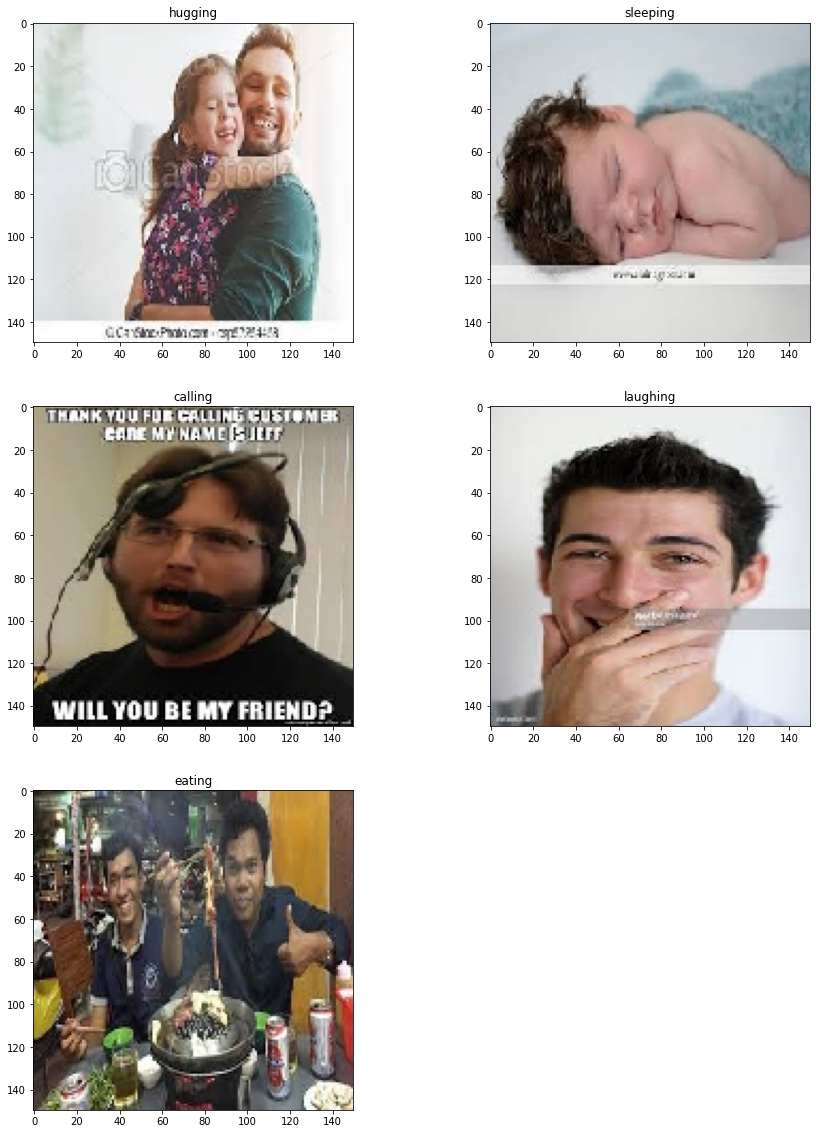

In [69]:
display_random(5)